# Black Friday Dataset EDA and Feature Engineering 
#Cleaning and prepare the data for model training

In [42]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

##https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#importing the dataset
df_train=pd.read_csv("train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Problem Statement   :
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [44]:
df_train.shape

(550068, 12)

#when working for kagggle do combine the train and test data so that u can do preprocessing on the whole data 

In [45]:
df_test=pd.read_csv("test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [46]:
#merge data

#u can use merge also
df=df_train.append(df_test)#appended data to the bottom 
#merge is side by side
df.head()

/var/folders/6x/zr94_3js1ms3j4vjlltrp86r0000gn/T/ipykernel_23671/2166643219.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)#appended data to the bottom


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [48]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [50]:
df.drop(["User_ID"],axis=1,inplace=True)# column wise
#User_ID	 is useless

In [51]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


#data pre-processing

In [ ]:
#we will fix the categorical features

In [53]:
#this is hassle to add this coln and remove the col
pd.get_dummies(df["Gender"]).head()
# df["Gender"]=pd.get_dummies(df["Gender"])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [80]:
#better 
df["Gender"]=df["Gender"].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,NaN,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,NaN,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,NaN,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,NaN,2,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [56]:
# handle categorical age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [60]:
pd.get_dummies(df["Age"],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
233594,0,1,0,0,0,0
233595,0,1,0,0,0,0
233596,0,1,0,0,0,0
233597,0,0,0,1,0,0


# some age have higher tendency to shop than other ,by dummy we are giving all categrory equal weight but we need diff weight ,so going with usual decoing

In [61]:
df["Age"]=df["Age"].map({'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7})

In [65]:
#level encoding can also be done
'''##second technqiue   
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()'''

"##second technqiue   \nfrom sklearn import preprocessing\n \n# label_encoder object knows how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\n \n# Encode labels in column 'species'.\ndf['Age']= label_encoder.fit_transform(df['Age'])\n \ndf['Age'].unique()"

In [63]:

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,NaN,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,NaN,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,NaN,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,NaN,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,NaN,2,16,C,4+,0,8,NaN,NaN,7969.0


In [72]:
#fixing categorical city_category
pd.get_dummies(df["City_Category"]).head()


,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [77]:
df_city=pd.get_dummies(df["City_Category"],drop_first=True)#A is removed
df=pd.concat([df,df_city],axis=1)#cancat needs axis
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,NaN,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,NaN,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,NaN,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,NaN,2,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [82]:
#drop city_category
df.drop("City_Category",axis=1,inplace=True)

In [83]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,NaN,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,NaN,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,NaN,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,NaN,2,16,4+,0,8,NaN,NaN,7969.0,0,1


In [86]:
#Handing missing values
df.isnull().sum()
#in sir's data gender is not null in my case it is coming null and the code for gender is not working

#purchase is test data so it should be null and no need to change it

Product_ID                         0
Gender                        783667
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [88]:
##replacing missing values
df["Product_Category_2"].unique()
#the ouput is a discrete feature

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [89]:
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [90]:
#replace the missing vlaue with mode
#not mean because mean will crete a new category

In [93]:
df["Product_Category_2"].mode()
#This is series and we will have to pick the mean value


0    8.0
Name: Product_Category_2, dtype: float64

In [94]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [96]:
df["Product_Category_2"].isnull().sum()# data is modified

0

In [ ]:
#replacing missing value for product_category3

In [98]:
df["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [99]:
df["Product_Category_2"].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [100]:
df["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [101]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,NaN,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,NaN,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,NaN,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,NaN,2,16,4+,0,8,8.0,16.0,7969.0,0,1


In [102]:
df["Stay_In_Current_City_Years"].unique()
#4+ can be treated as 4

array(['2', '4+', '3', '1', '0'], dtype=object)

In [104]:
df["Stay_In_Current_City_Years"].str.replace("+"," ")

/var/folders/6x/zr94_3js1ms3j4vjlltrp86r0000gn/T/ipykernel_23671/1340588296.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"].str.replace("+"," ")


0          2
1          2
2          2
3          2
4         4 
          ..
233594    4 
233595    4 
233596    4 
233597    4 
233598    4 
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [105]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+"," ")

/var/folders/6x/zr94_3js1ms3j4vjlltrp86r0000gn/T/ipykernel_23671/1102137257.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+"," ")


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(2)
memory usage: 67.3+ MB


In [107]:
# Stay_In_Current_City_Years is in object we need to convert it in integers

In [ ]:
#convert obj into integers

In [109]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(2)
memory usage: 67.3+ MB


In [110]:
#B                           783667 non-null  uint8  
#C                         783667 non-null  uint8 
#we need to convert to int

In [114]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 77.7+ MB


In [115]:
#Visulation

/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

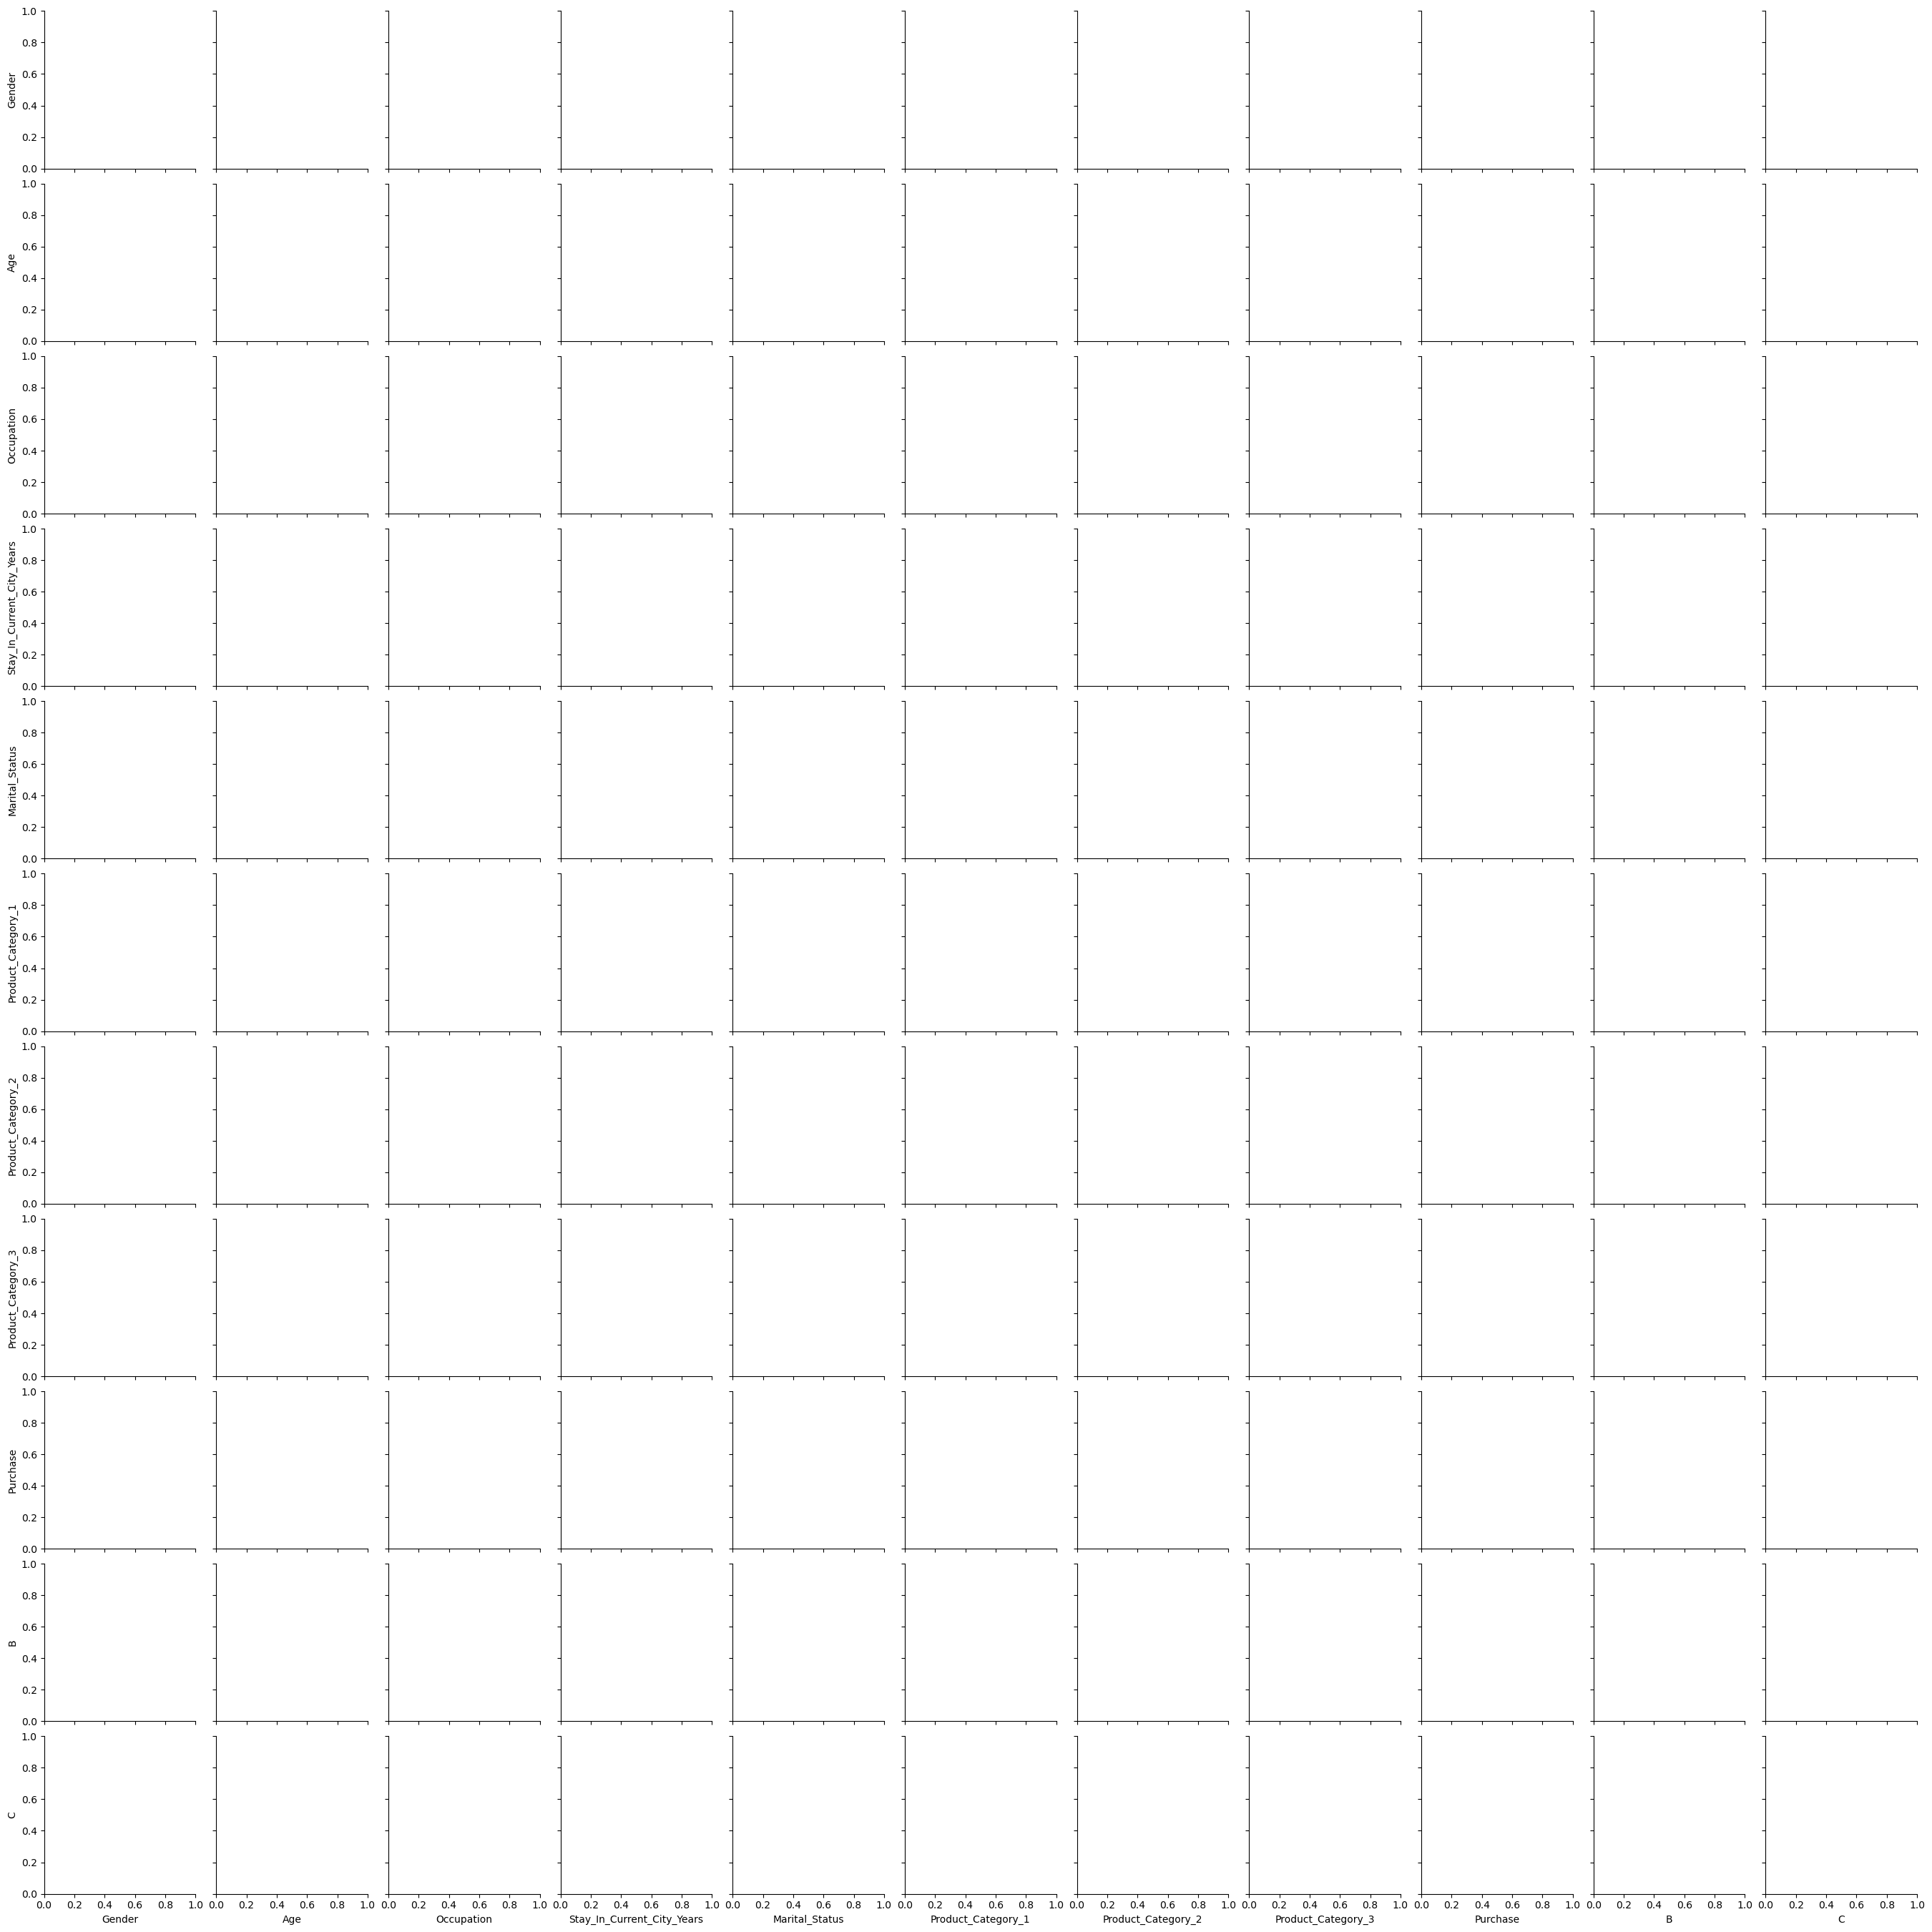

In [117]:
#sir will inform why error
sns.pairplot(df)

/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

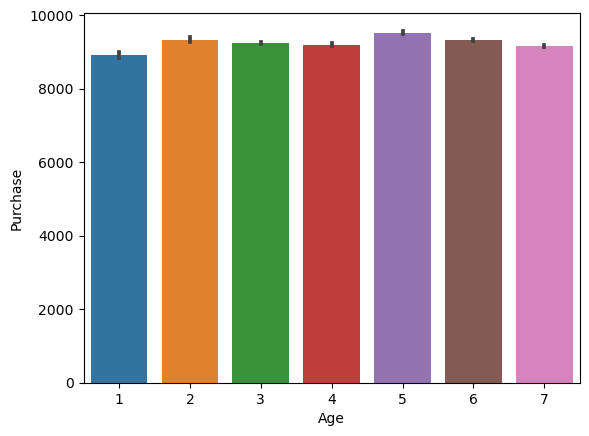

In [123]:
sns.barplot('Age','Purchase',data=df)#hue=Gender)#gender wont work in mine cause it is null

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

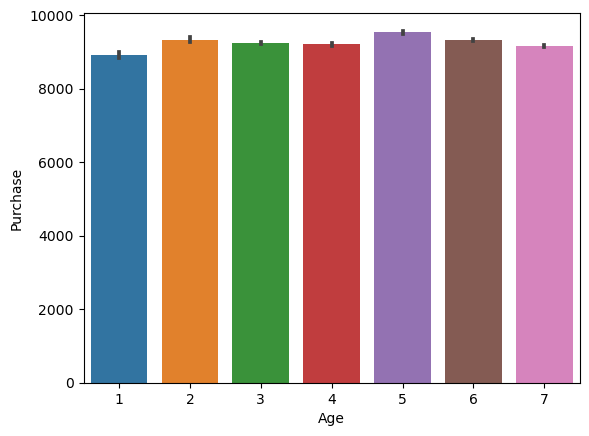

In [124]:
sns.barplot(x='Age',y='Purchase',data=df)#hue=Gender)#gender wont work in mine cause it is null

In [125]:
#purchase with occupations

AxesSubplot(0.125,0.11;0.775x0.77)


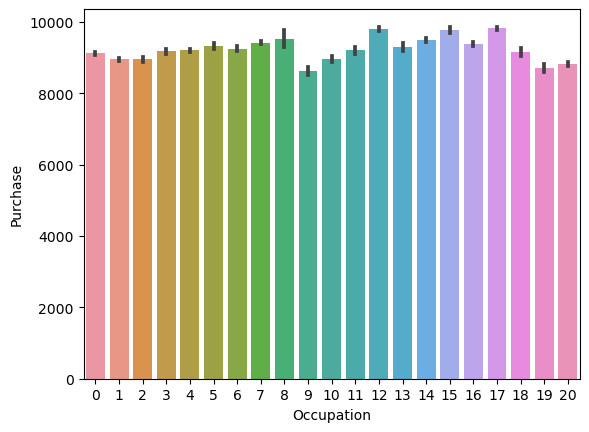

In [127]:
print(sns.barplot(x='Occupation',y='Purchase',data=df))

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

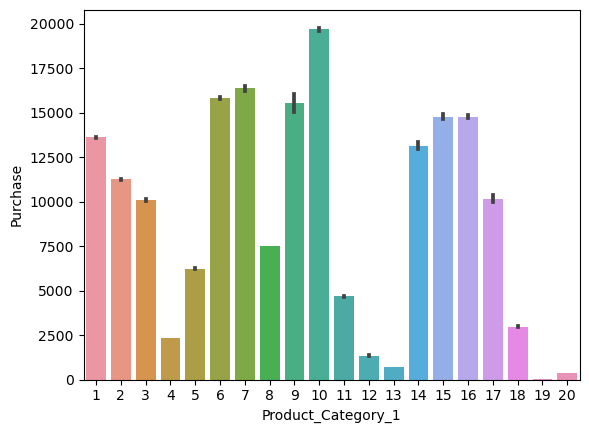

In [128]:
sns.barplot(x='Product_Category_1',y='Purchase',data=df)

##Feature Scaling

In [130]:
df_test=df[df["Purchase"].isnull()]
#where purchase is null it is test data

In [131]:
df_test

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,NaN,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,NaN,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,NaN,6,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,NaN,6,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,NaN,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,NaN,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,NaN,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,NaN,3,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,NaN,4,1,4,0,10,16.0,16.0,NaN,0,1


In [133]:
df[~df["Purchase"].isnull()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,NaN,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,NaN,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,NaN,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,NaN,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,NaN,2,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,NaN,5,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,NaN,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,NaN,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,NaN,2,1,2,0,20,8.0,16.0,365.0,0,1


In [135]:
df_train=df[~df["Purchase"].isnull()]

In [139]:
#df_train.drop('Product_ID',axis=1,inplace=True)
#df_test.drop('Product_ID',axis=1,inplace=True)
#product_id not useful